In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Missing Values Handling 

In [6]:
data['bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [7]:
data.bmi=data.bmi.fillna(28.7)

In [8]:
#missing_bmi=data.bmi.mean()
#missing_bmi = float("{:.1f}".format(missing_bmi))
#missing_bmi

In [9]:
#data.bmi=data.bmi.fillna(missing_bmi)

In [10]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [1]:
#data['bmi'].value_counts()

In [12]:
data.isnull().sum()
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data  Visualization

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
def bar_chart(feature):
    stroke = data[data['stroke']==1][feature].value_counts()
    #notstroke = data[data['stroke']==0][feature].value_counts()
    df = pd.DataFrame([stroke])
    df.index = ['stroke']
    df.plot(kind='bar',stacked=0, figsize=(10,7))

In [16]:
datatrain = [data] 
for dataset in datatrain:
    dataset.loc[ (dataset['age'] <=2), 'age'] = 0  #Childhood
    dataset.loc[(dataset['age'] > 2) & (dataset['age'] <= 39), 'age'] = 1 #Young  Adults
    dataset.loc[(dataset['age'] > 39) & (dataset['age'] <= 59), 'age'] = 2 #Middle -Aged Adults
    dataset.loc[ dataset['age'] > 59, 'age'] = 3 #old Adults

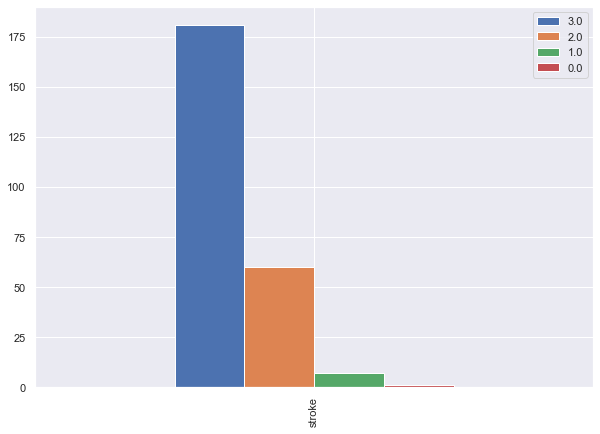

In [17]:
bar_chart('age')

In [18]:

for dataset in datatrain:
    dataset.loc[ (dataset['bmi'] <= 18.5), 'bmi'] = 0
    dataset.loc[(dataset['bmi'] > 18.5) & (dataset['bmi'] <= 24.9),'bmi'] = 1
    dataset.loc[(dataset['bmi'] > 24.9) & (dataset['bmi'] <= 29.9),'bmi'] = 2
    dataset.loc[ dataset['bmi'] > 29.9, 'bmi'] = 3

# BMI	Weight Status
[0=Below 18.5	Underweight]
[1=18.5 – 24.9	Normal or Healthy Weight]
[2=25.0 – 29.9	Overweight]
[3=30.0 and Above	Obese]

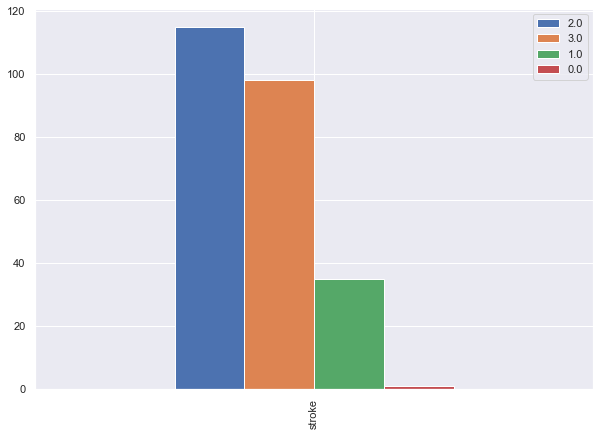

In [19]:
bar_chart('bmi')

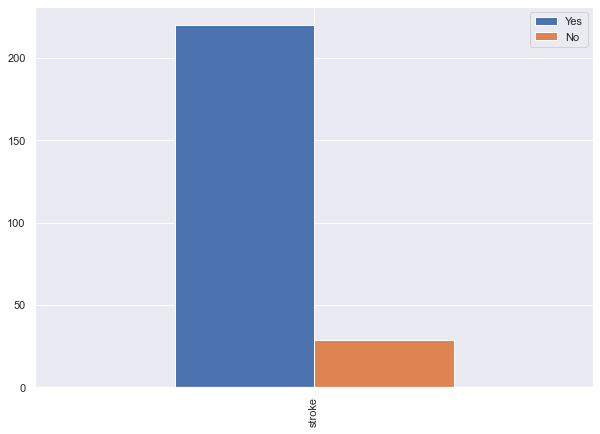

In [20]:
bar_chart('ever_married')

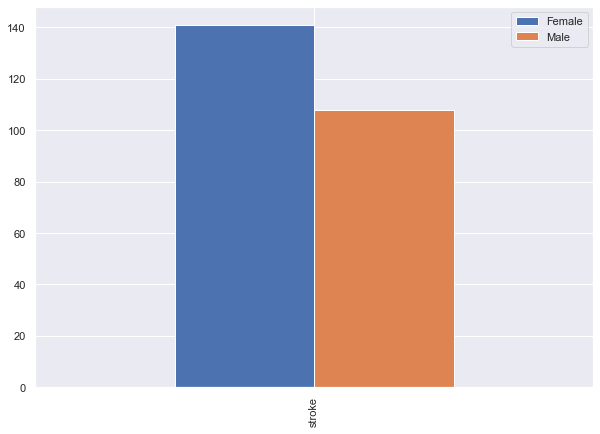

In [21]:
bar_chart('gender')

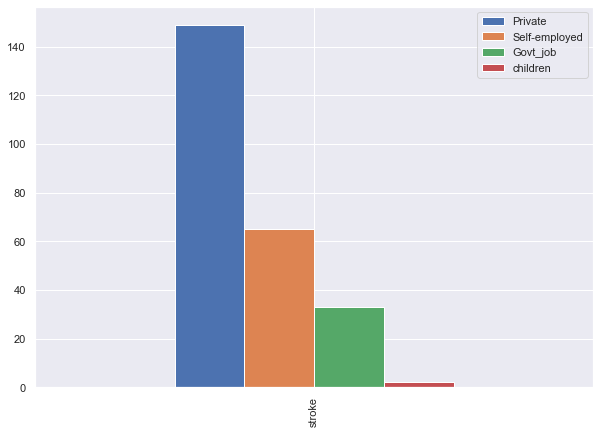

In [22]:
bar_chart('work_type')

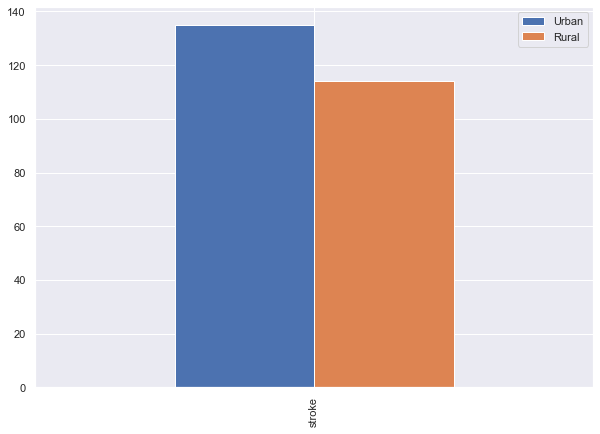

In [23]:
bar_chart('Residence_type')

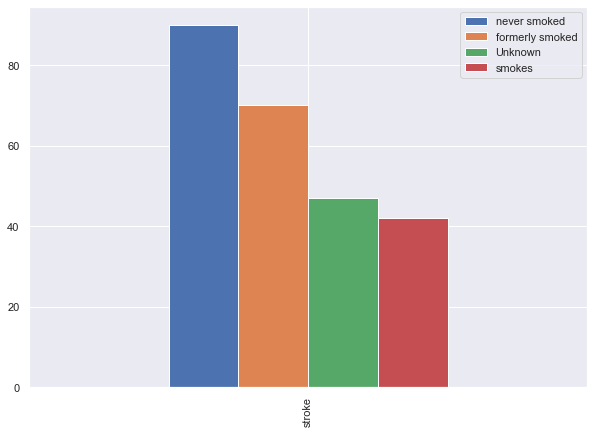

In [24]:
bar_chart('smoking_status')

# Feature Engineering

In [25]:
data.drop('id',axis=1,inplace=True)

In [26]:
#Featuring 
datatrain = [data] 
sex_mapping = {"Male": 0, "Female": 1,"Other": 2}
for dataset in datatrain:
    dataset['gender'] = dataset['gender'].map(sex_mapping)

In [27]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,Yes,Private,Urban,228.69,3.0,formerly smoked,1
1,1,3.0,0,0,Yes,Self-employed,Rural,202.21,2.0,never smoked,1
2,0,3.0,0,1,Yes,Private,Rural,105.92,3.0,never smoked,1
3,1,2.0,0,0,Yes,Private,Urban,171.23,3.0,smokes,1
4,1,3.0,1,0,Yes,Self-employed,Rural,174.12,1.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,3.0,1,0,Yes,Private,Urban,83.75,2.0,never smoked,0
5106,1,3.0,0,0,Yes,Self-employed,Urban,125.20,3.0,never smoked,0
5107,1,1.0,0,0,Yes,Self-employed,Rural,82.99,3.0,never smoked,0
5108,0,2.0,0,0,Yes,Private,Rural,166.29,2.0,formerly smoked,0


In [28]:
marriage_mapping = {"No": 0, "Yes": 1}
for dataset in datatrain:
    dataset['ever_married'] = dataset['ever_married'].map(marriage_mapping)

In [29]:
#max(data['age'])

In [31]:
#max(data['age'])
#data['age']

In [32]:
worktype=list(set(data["work_type"]))
worktype

['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked']

In [33]:
work_mapping = {'Private':0, 'Self-employed':1, 'Govt_job':2, 'Never_worked':3, 'children':4}
for dataset in datatrain:
    dataset['work_type'] = dataset['work_type'].map(work_mapping)

In [34]:
residence_mapping = {"Urban": 0, "Rural": 1}
for dataset in datatrain:
    dataset['Residence_type'] = dataset['Residence_type'].map(residence_mapping)

In [35]:
smoking_mapping = {'Unknown':3, 'never smoked':0, 'smokes':1, 'formerly smoked':2}
for dataset in datatrain:
    dataset['smoking_status'] = dataset['smoking_status'].map(smoking_mapping)

In [36]:
#smoking=list(set(data["smoking_status"]))
#smoking

In [37]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,1,0,0,228.69,3.0,2,1
1,1,3.0,0,0,1,1,1,202.21,2.0,0,1
2,0,3.0,0,1,1,0,1,105.92,3.0,0,1
3,1,2.0,0,0,1,0,0,171.23,3.0,1,1
4,1,3.0,1,0,1,1,1,174.12,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,3.0,1,0,1,0,0,83.75,2.0,0,0
5106,1,3.0,0,0,1,1,0,125.20,3.0,0,0
5107,1,1.0,0,0,1,1,1,82.99,3.0,0,0
5108,0,2.0,0,0,1,0,1,166.29,2.0,2,0


# Splitng Data for Training

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x =data.drop(['stroke'],axis=1)

In [40]:
y=data['stroke']

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=100)

# Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
model=SVC()

In [44]:
model.fit(xtrain,ytrain)

SVC()

In [45]:
pred=model.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9561815336463224

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred))

[[1222    0]
 [  56    0]]


In [49]:
model.score(xtest,ytest)

0.9561815336463224

In [50]:
from sklearn.metrics import f1_score
f1_score(ytest,pred,average='weighted')

0.9347630672926449

In [51]:
#60% data
atrain,atest,btrain,btest=train_test_split(x,y,test_size=.60,random_state=1)
model.score(atest,btest)

0.952054794520548

In [52]:
#total data
model.score(x,y)

0.9512720156555773

# RandomForestClassifier

In [53]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
predrfc=rfc.predict(xtest)
predrfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predrfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1222
           1       0.16      0.05      0.08        56

    accuracy                           0.95      1278
   macro avg       0.56      0.52      0.53      1278
weighted avg       0.92      0.95      0.93      1278



In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predrfc))

[[1206   16]
 [  53    3]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predrfc)

0.9460093896713615

In [58]:
rfc.score(xtest,ytest)

0.9460093896713615

In [59]:
#60% test data
rfc.score(atest,btest)

0.9895629484670581

In [60]:
#total data
rfc.score(x,y)

0.9864970645792563

# Decision Tree Classifier

In [61]:
#DTC
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
preddtc=dtc.predict(xtest)
preddtc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(ytest,preddtc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1222
           1       0.12      0.18      0.14        56

    accuracy                           0.91      1278
   macro avg       0.54      0.56      0.55      1278
weighted avg       0.92      0.91      0.91      1278



In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,preddtc)

array([[1148,   74],
       [  46,   10]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,preddtc)

0.9061032863849765

In [66]:
dtc.score(xtest,ytest)

0.9061032863849765

In [67]:
#60% test data
dtc.score(atest,btest)

0.9794520547945206

In [68]:
#total data
dtc.score(x,y)

0.9765166340508806

# Gaussian Naive Bayes (GaussianNB)

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [70]:
predgnb=gnb.predict(xtest)
predgnb

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predgnb))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1222
           1       0.17      0.57      0.26        56

    accuracy                           0.86      1278
   macro avg       0.57      0.72      0.59      1278
weighted avg       0.94      0.86      0.89      1278



In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predgnb))

[[1062  160]
 [  24   32]]


In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predgnb)

0.8560250391236307

In [74]:
gnb.score(xtest,ytest)


0.8560250391236307

# K-Nearest Kneighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier(n_neighbors=61)

In [76]:
KNNC.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=61)

In [77]:
predknnc=KNNC.predict(xtest)
predknnc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predknnc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predknnc))

[[1222    0]
 [  56    0]]


In [80]:
KNNC.score(xtest,ytest)

0.9561815336463224

In [81]:
#60% test data
KNNC.score(atest,btest)

0.952054794520548

In [82]:
#total data
KNNC.score(x,y)

0.9512720156555773

# Bagging Classifier

In [83]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(n_estimators = 500, max_samples = 0.5, max_features = 0.5)
BC.fit(xtrain,ytrain)

BaggingClassifier(max_features=0.5, max_samples=0.5, n_estimators=500)

In [84]:
predbc=BC.predict(xtest)
predbc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predbc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predbc))

[[1222    0]
 [  56    0]]


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predbc)

0.9561815336463224

In [88]:
BC.score(xtest,ytest)

0.9561815336463224

# Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import  GradientBoostingClassifier
GBC= GradientBoostingClassifier()

In [90]:
GBC.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [91]:
predgbc=GBC.predict(xtest)
predgbc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predgbc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.29      0.04      0.06        56

    accuracy                           0.95      1278
   macro avg       0.62      0.52      0.52      1278
weighted avg       0.93      0.95      0.94      1278



In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred))

[[1222    0]
 [  56    0]]


In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predgbc)

0.9538341158059468

In [95]:
GBC.score(xtest,ytest)

0.9538341158059468

# Extra Trees Classifier

In [96]:
from sklearn.ensemble import  ExtraTreesClassifier
ETC = ExtraTreesClassifier()

In [97]:
ETC.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [98]:
predETC=ETC.predict(xtest)
predETC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predETC))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1222
           1       0.12      0.09      0.10        56

    accuracy                           0.93      1278
   macro avg       0.54      0.53      0.53      1278
weighted avg       0.92      0.93      0.93      1278



In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predETC))

[[1184   38]
 [  51    5]]


In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predETC)

0.9303599374021909

In [102]:
ETC.score(xtest,ytest)

0.9303599374021909

# Artificial Neural Network

In [103]:
import tensorflow as tf
from tensorflow import keras

In [104]:
modelss = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[10], activation='tanh'),
    tf.keras.layers.Dense(1, input_shape=[10], activation='linear')
])

In [105]:
modelss.compile(
optimizer='adamax',
    loss='mean_squared_error',
    metrics=['accuracy']

)

In [106]:
modelss.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [107]:
modelss.fit(x,y,epochs=500)

Epoch 1/500
160/160 [==============================] - 0s 550us/step - loss: 0.2013 - accuracy: 0.7407
Epoch 2/500
160/160 [==============================] - 0s 654us/step - loss: 0.0863 - accuracy: 0.9513
Epoch 3/500
160/160 [==============================] - 0s 623us/step - loss: 0.0544 - accuracy: 0.9513
Epoch 4/500
160/160 [==============================] - 0s 673us/step - loss: 0.0476 - accuracy: 0.9513
Epoch 5/500
160/160 [==============================] - 0s 630us/step - loss: 0.0465 - accuracy: 0.9513
Epoch 6/500
160/160 [==============================] - 0s 642us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 7/500
160/160 [==============================] - 0s 617us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 8/500
160/160 [==============================] - 0s 579us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 9/500
160/160 [==============================] - 0s 438us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 10/500
160/160 [==============================] - 0s 642us/step - l

160/160 [==============================] - 0s 516us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 158/500
160/160 [==============================] - 0s 455us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 159/500
160/160 [==============================] - 0s 592us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 160/500
160/160 [==============================] - 0s 609us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 161/500
160/160 [==============================] - 0s 736us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 162/500
160/160 [==============================] - 0s 667us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 163/500
160/160 [==============================] - 0s 711us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 164/500
160/160 [==============================] - 0s 742us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 165/500
160/160 [==============================] - 0s 673us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 166/500
160/160 [==============================] - 0s 667us/ste

160/160 [==============================] - 0s 523us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 313/500
160/160 [==============================] - 0s 583us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 314/500
160/160 [==============================] - 0s 686us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 315/500
160/160 [==============================] - 0s 603us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 316/500
160/160 [==============================] - 0s 644us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 317/500
160/160 [==============================] - 0s 472us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 318/500
160/160 [==============================] - 0s 455us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 319/500
160/160 [==============================] - 0s 502us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 320/500
160/160 [==============================] - 0s 524us/step - loss: 0.0464 - accuracy: 0.9513
Epoch 321/500
160/160 [==============================] - 0s 573us/ste

160/160 [==============================] - 0s 592us/step - loss: 0.0495 - accuracy: 0.9513
Epoch 468/500
160/160 [==============================] - 0s 536us/step - loss: 0.0493 - accuracy: 0.9513
Epoch 469/500
160/160 [==============================] - 0s 592us/step - loss: 0.0491 - accuracy: 0.9513
Epoch 470/500
160/160 [==============================] - 0s 542us/step - loss: 0.0487 - accuracy: 0.9513
Epoch 471/500
160/160 [==============================] - 0s 592us/step - loss: 0.0483 - accuracy: 0.9513
Epoch 472/500
160/160 [==============================] - 0s 594us/step - loss: 0.0480 - accuracy: 0.9513
Epoch 473/500
160/160 [==============================] - 0s 542us/step - loss: 0.0477 - accuracy: 0.9513
Epoch 474/500
160/160 [==============================] - 0s 686us/step - loss: 0.0474 - accuracy: 0.9513
Epoch 475/500
160/160 [==============================] - 0s 555us/step - loss: 0.0471 - accuracy: 0.9513
Epoch 476/500
160/160 [==============================] - 0s 637us/ste

In [108]:
#modelss.score(xtest,ytest)

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', random_state=1)

In [110]:
LR.fit(xtrain,ytrain)

C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=1)

In [111]:
predlr=LR.predict(xtest)
predlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predlr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predlr))

[[1222    0]
 [  56    0]]


In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predlr)

0.9561815336463224

In [115]:
LR.score(xtest,ytest)

0.9561815336463224

# Stochastic Gradient Descent Classifier

In [116]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()

In [117]:
SGDC.fit(xtrain,ytrain)

SGDClassifier()

In [118]:
predsgdc=SGDC.predict(xtest)
predsgdc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predsgdc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predsgdc))

[[1222    0]
 [  56    0]]


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predsgdc)

0.9561815336463224

In [122]:
SGDC.score(xtest,ytest)

0.9561815336463224

# Quadratic Discriminant Analysis

In [123]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()

In [124]:
QDA.fit(xtrain,ytrain)


QuadraticDiscriminantAnalysis()

In [125]:
predqda=QDA.predict(xtest)
predqda

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predqda))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1222
           1       0.20      0.57      0.29        56

    accuracy                           0.88      1278
   macro avg       0.59      0.73      0.61      1278
weighted avg       0.94      0.88      0.91      1278



In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predqda))

[[1092  130]
 [  24   32]]


In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predqda)

0.8794992175273866

In [129]:
QDA.score(xtest,ytest)

0.8794992175273866

# Ada Boost Classifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()

In [131]:
ABC.fit(xtrain,ytrain)


AdaBoostClassifier()

In [132]:
predabc=ABC.predict(xtest)
predabc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predabc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.50      0.02      0.03        56

    accuracy                           0.96      1278
   macro avg       0.73      0.51      0.51      1278
weighted avg       0.94      0.96      0.94      1278



In [134]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predabc))

[[1221    1]
 [  55    1]]


In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predabc)

0.9561815336463224

In [136]:
ABC.score(xtest,ytest)

0.9561815336463224

# Multi-layer Perceptron classifier

In [137]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(100),
                     activation='relu', 
                     solver='adam', 
                     alpha=0.0001,batch_size= 'auto',
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     power_t=0.5, max_iter=200,
                     shuffle=True,
                     random_state=None,
                     tol=0.0001,
                     verbose=False,
                     warm_start=False, 
                     momentum=0.9,
                     nesterovs_momentum=True,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08)
#MLPC = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
#MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [138]:
MLPC.fit(xtrain,ytrain)


MLPClassifier(hidden_layer_sizes=100)

In [139]:
predmlpc=MLPC.predict(xtest)
predmlpc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predmlpc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predmlpc))

[[1222    0]
 [  56    0]]


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predmlpc)

0.9561815336463224

In [143]:
MLPC.score(xtest,ytest)

0.9561815336463224

# Voting Classifier

In [144]:
from sklearn.ensemble import VotingClassifier

In [145]:
modelss=[('model',model),('rfc',rfc),('dtc',dtc),('gnb',gnb),('KNNC',KNNC),('BC',BC),('GBC',GBC),('ETC',ETC),('LR',LR),('SGDC',SGDC),('QDA',QDA),('ABC',ABC),('MLPC',MLPC)]
vcf=VotingClassifier(estimators=modelss,voting='hard',weights=[2,1,1,1,1,1,1,1,1,1,1,1,1],flatten_transform=False)

In [146]:
vcf.fit(xtrain,ytrain)
vcf.score(xtest,ytest)

C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9561815336463224

In [147]:
predvcf=vcf.predict(xtest)
predvcf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predvcf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Polash\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [149]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predvcf))

[[1222    0]
 [  56    0]]
